## 패키지 import

In [74]:
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data 
# 텐서플로우 1버전에서 사용하는 방법

In [75]:
import sys
import numpy as np
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt

## MNIST data set import

In [76]:
mnist = tf.keras.datasets.mnist

In [77]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 데이터 전처리

In [78]:
# normalization
x_train, x_test = x_train/255.0, x_test/255.0

## 모델 구성

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 데이터 시각화

Image Shape :  (28, 28)
Image Label :  5


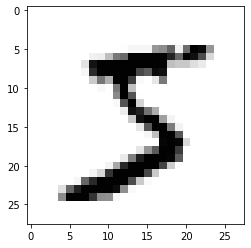

In [81]:
# 0번째 원소의 정보 출력
print("Image Shape : ", x_train[0].shape)
print("Image Label : ", y_train[0])

# 0번째 원소를 흑백으로 출력
plt.imshow(x_train[0].reshape(28, 28), cmap='Greys')
plt.show()

## 모델 구성

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 모델 컴파일

In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 모델 요약

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [87]:
model.fit(x_train, y_train, 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9825: 0s - loss: 0.0602 - ac
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0312 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0184 - accuracy: 0.9939


## 정확도 평가

In [88]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy : ", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0697 - accuracy: 0.9806
Accuracy :  0.9805999994277954


## 결과 확인

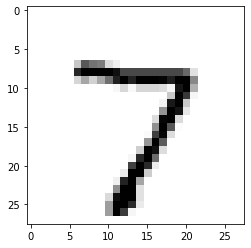

The predictions are  [[2.3204813e-11 7.3712919e-12 1.5745832e-09 7.1370971e-07 1.2166546e-14
  1.4297659e-10 4.1582409e-17 9.9999857e-01 5.4390589e-11 7.5047564e-07]]
The answer is  7


In [89]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()
print("The predictions are ", model.predict(x_test[n].reshape((1,28,28,1))))
print("The answer is ", np.argmax(model.predict(x_test[n].reshape((1,28,28,1)))))